In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity 
from qiskit.tools.visualization import plot_histogram

from qiskit import *
IBMQ.load_accounts(hub=None)
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.ibmq import least_busy

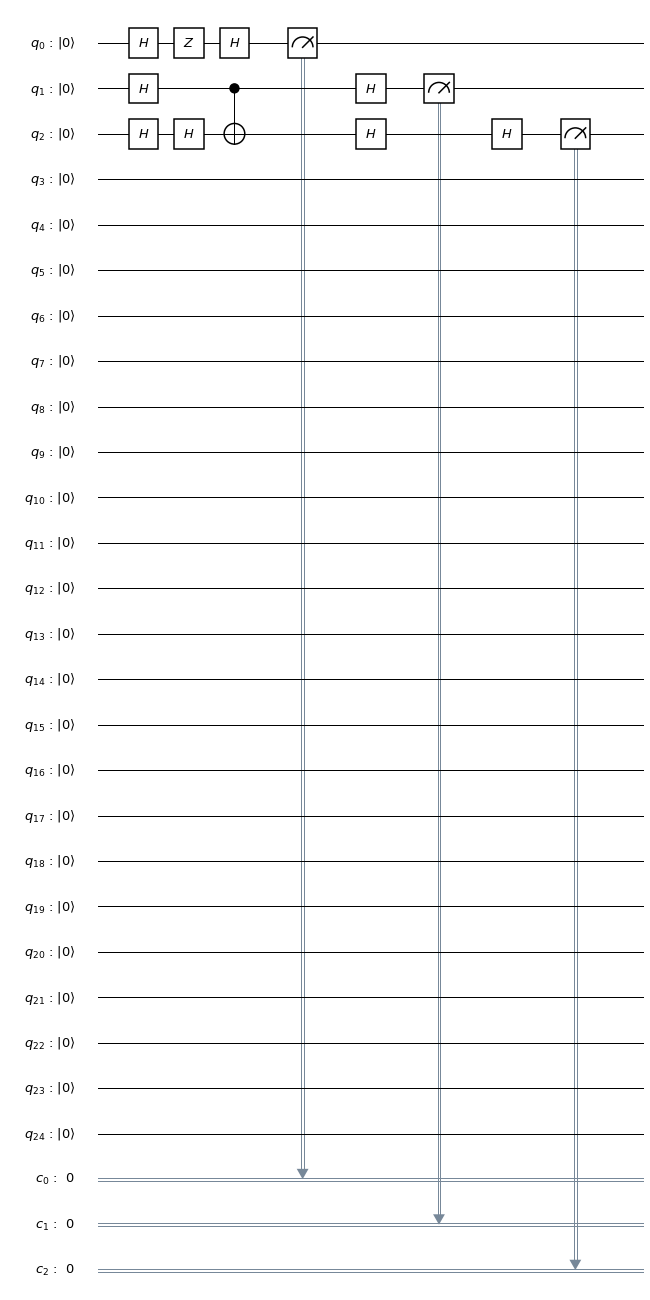

In [6]:
#balanced
q = QuantumRegister(25, 'q')
c = ClassicalRegister(3, 'c')

circ = QuantumCircuit()
circ.add_register(q)
circ.add_register(c)

circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[2])
circ.cx(q[1],q[2])
circ.z(q[0])
circ.h(q[2])
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])

circ.measure(q[0],c[0])
circ.measure(q[1],c[1])
circ.measure(q[2],c[2])

circ.draw(output='mpl')

In [8]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(circ, backend_sim).result()
counts = result.get_counts(circ)
print(counts)

plot_histogram(counts)

BasicAerError: 'Number of qubits 25 is greater than maximum (24) for "qasm_simulator".'